In [33]:
!which python

/home/ubuntu/anaconda3/envs/myenv/bin/python


In [2]:
import pandas as pd
import os

In [3]:
!pwd

/rds/prj_ppn_ar_group/Tao/ohsn/ohsn/time_series


In [34]:
# path = '/home/jovyan/work/ohsn/ohsn/time_series/'
path = '/home/ubuntu/rds/prj_ppn_ar_group/Tao/ohsn/ohsn/time_series/'

In [35]:
# !cd $path && ls -l data
# # !cd data/ && ls -l wwwpeereff_*.csv
# !head -n 5 /home/jovyan/work/ohsn/ohsn/time_series/data/wwwpeereff_0.csv 

In [36]:
def combine_csv(input_dir, output_file):
    # List to hold DataFrames
    dfs = []
    
    # Iterate through all CSV files in the input directory
    for i in range(1000):
        file_path = os.path.join(input_dir, f'wwwpeereff_{i}.csv')
        if os.path.exists(file_path):
            # Read the CSV file and append the DataFrame to the list
            df = pd.read_csv(file_path)
            # print(f"Reading {file_path} with shape {df.shape}")
            # if df.shape[1] != 99:
                # print(f"Warning: {file_path} does not have 99 columns, it has {df.shape[1]} columns.")
            dfs.append(df)
        else:
            print(f"File {file_path} does not exist.")
    
    # Concatenate all DataFrames in the list into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # Write the combined DataFrame to a new CSV file
    combined_df.to_csv(output_file, index=False)

In [37]:
combine_csv(path + 'data', path + 'data/combined_wwwpeereff.csv')

In [38]:
# df = pd.read_csv(path + 'data/peereff.csv')
# com = pd.read_csv(path + 'data/fed.com.csv')
df = pd.read_csv(path + 'data/combined_wwwpeereff.csv')
com = pd.read_csv(path + 'data/www.newcom.csv')

In [43]:
df.shape

(15641, 99)

In [44]:
df = df[(df['fnum']>1) & (df['ffnum']>1)]

In [45]:
df.shape

(15641, 99)

In [46]:
# df = pd.read_csv(path + 'data/wwwpeereff_1.csv')

<Axes: ylabel='Density'>

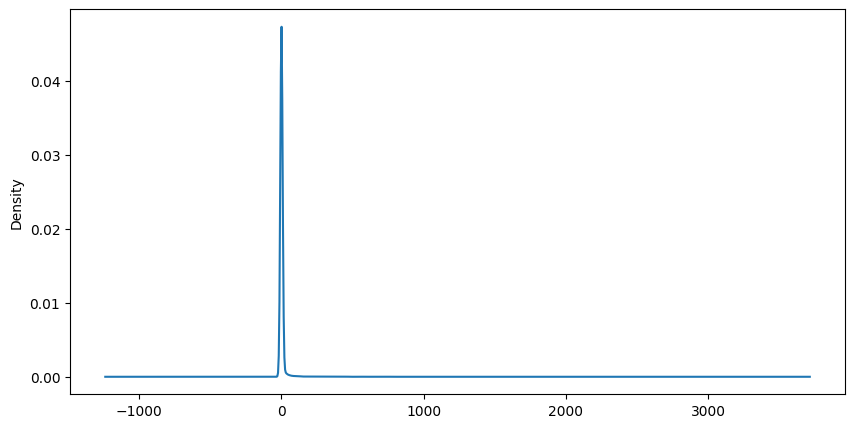

In [47]:
df['friends_ratio'].plot(kind='density', figsize=(10, 5))

In [48]:
print(df[df['friends_ratio']>1].shape)
print(df[df['friends_ratio']<0].shape)
print(df[(df['friends_ratio']<=1) & (df['friends_ratio']>=0)].shape)

(1685, 99)
(0, 99)
(13956, 99)


In [49]:
df = df[(df['friends_ratio']<=1) & (df['friends_ratio']>=0)]

In [50]:
# com.head()

In [55]:
df[df['friends_ratio']>0.45].shape

(3528, 99)

<Axes: ylabel='Density'>

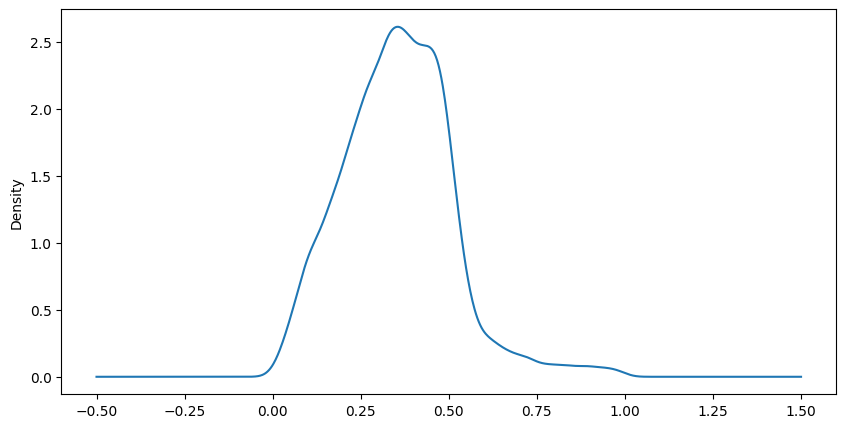

In [56]:
df['friends_ratio'].plot(kind='density', figsize=(10, 5))